In [1]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../')
os.chdir("../")

base_folder = "./data/interim/model_data/"

In [2]:

vre_screening_df = pd.read_csv(base_folder + "VRE_SCREENING_DATA.csv", encoding="ISO-8859-1", parse_dates=["Birth Date", "Measurement Date"], dtype="str")

# do some preprocessing
vre_screening_df["Patient ID"] = vre_screening_df["Patient ID"].apply(lambda patient_id: str(patient_id).zfill(11))

In [3]:
vre_screening_df

,Order ID,Record Date,Measurement Date,Last Name,First Name,Birth Date,Patient ID,Requester,Cost Unit,Material Type,Transport,Result,Analysis Method,Screening Context
0,2803033,30.12.2017,2017-12-29,Streiff,Roland,1965-04-10,00013253506,sepi,sepi,are,tmpo,nn,Kolonie,NaN
1,2803033,2017-12-30,2017-12-29,Streiff,Roland,1965-10-04,00013253506,sepi,sepi,are,tmpo,nn,Kolonie,NaN
2,2803034,2017-12-30,2017-12-29,Streiff,Roland,1965-10-04,00013253506,sepi,sepi,a,tmpo,nn,Kolonie,Klinisch
3,2803034,30.12.2017,2017-12-29,Streiff,Roland,1965-04-10,00013253506,sepi,sepi,a,tmpo,nn,Kolonie,NaN
4,2803035,30.12.2017,2017-12-29,RÃÂ¼fenacht,Roland,1956-01-18,00006240593,sepi,sepi,are,tmpo,nn,Kolonie,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39336,NaN,2020-03-04 00:00:00,2020-03-09,Nobs,Annelise,1953-04-20,00008026173,NaN,NaN,NaN,NaN,VAN B,NaN,KB
39337,NaN,2020-03-09 00:00:00,2020-03-11,Walther,Bernardo,1949-11-27,00008182809,NaN,NaN,NaN,NaN,VAN B,NaN,KP
39338,NaN,2020-03-09 00:00:00,2020-03-12,PfÃÂ¤ffli,Margrith,1951-05-30,00009290010,NaN,NaN,NaN,NaN,VAN A,NaN,WS
39339,NaN,2020-06-08 00:00:00,2020-06-10,Maurer,Martin,1966-10-17,00006156959,NaN,NaN,NaN,NaN,VAN B,NaN,WS


/home/benelot/miniconda3/envs/vre-spark/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':
/home/benelot/miniconda3/envs/vre-spark/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


Text(0.5, 1.0, 'Positives per week')

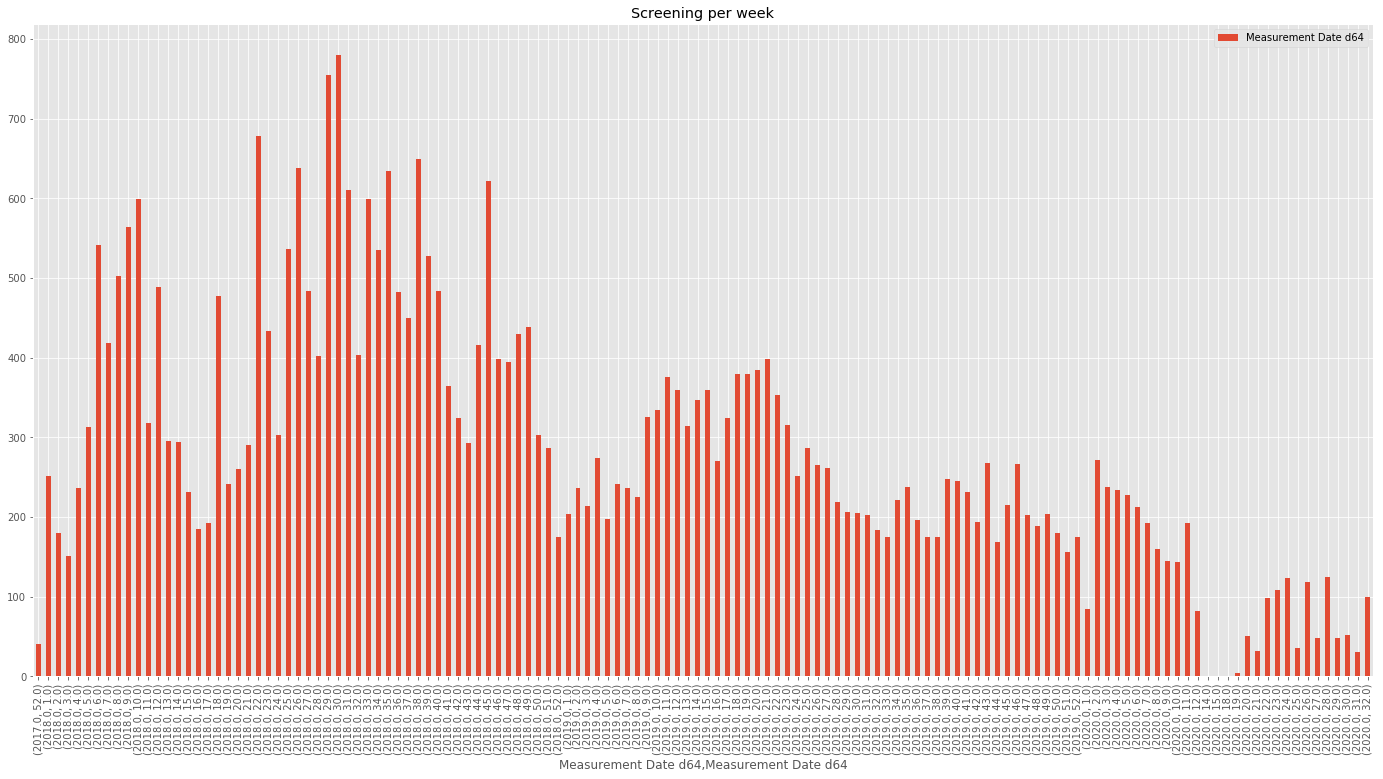

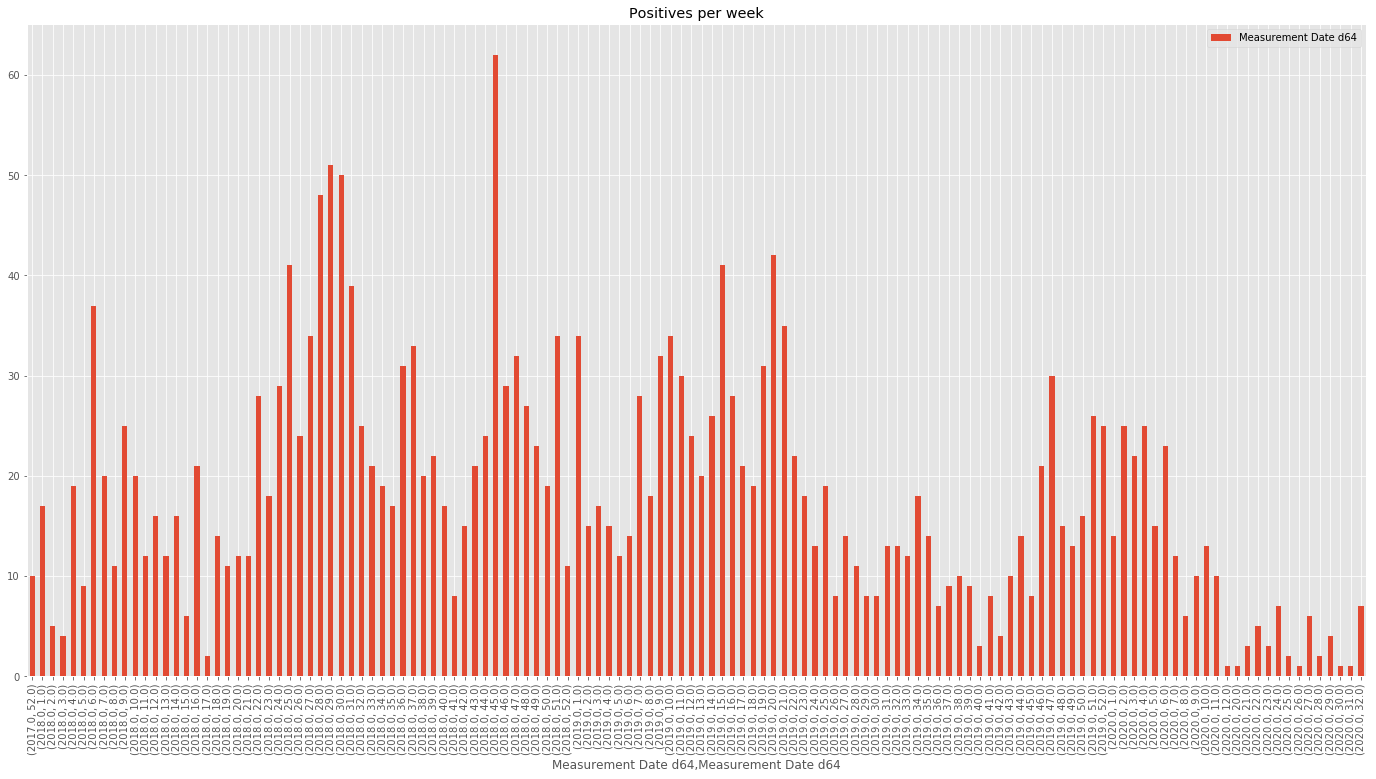

In [4]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(24,12))
df = vre_screening_df
vre_screening_df["Measurement Date d64"] = vre_screening_df["Measurement Date"].astype("datetime64")

df[["Measurement Date d64"]].groupby([df["Measurement Date d64"].dt.year, df["Measurement Date d64"].dt.week]).count().plot(kind="bar", ax=ax)

ax.set_title("Screening per week")

fig, ax = plt.subplots(figsize=(24,12))
df = vre_screening_df.loc[vre_screening_df["Result"] != "nn"]


vre_screening_df["Measurement Date d64"] = vre_screening_df["Measurement Date"].astype("datetime64")

df[["Measurement Date d64"]].groupby([df["Measurement Date d64"].dt.year, df["Measurement Date d64"].dt.week]).count().plot(kind="bar", ax=ax)

ax.set_title("Positives per week")

In [19]:
case_df = pd.read_csv(base_folder + "DIM_FALL.csv", encoding="ISO-8859-1", parse_dates=["Start Date", "End Date"], dtype=str)

In [21]:
case_df["Patient ID"] = case_df["Patient ID"].apply(lambda patient_id: str(patient_id).zfill(11))

In [22]:
case_df

,Case ID,Patient ID,Case Type ID,Case Status,Case Type,Start Date,End Date,Patient Type,Patient Status
0,0005752785,00013831402,2,closed,ambulatory,2017-01-12,2017-01-13,Standard Patient,active
1,0005752786,00013719092,2,closed,ambulatory,2017-01-12,2017-01-13,Standard Patient,active
2,0005752787,00082907641,2,open,ambulatory,2017-01-12,1753-01-01,Standard Patient,active
3,0005752788,00013320793,1,closed,in-patient,2017-01-12,1753-01-01,Standard Patient,active
4,0005752789,00009879676,2,closed,ambulatory,2017-01-12,2017-01-13,Standard Patient,active
...,...,...,...,...,...,...,...,...,...
2062916,0007650211,00012700703,2,open,ambulatory,2020-05-09,1753-01-01,Standard Patient,active
2062917,0007650212,00013909894,2,open,ambulatory,2020-05-09,1753-01-01,Standard Patient,active
2062918,0007650213,P0001605567,2,open,ambulatory,2020-05-10,1753-01-01,NaN,NaN
2062919,0007650214,00002621231,2,open,ambulatory,2020-05-10,1753-01-01,Standard Patient,active


In [17]:
stay_df = pd.read_csv(base_folder + "LA_ISH_NBEW.csv", encoding="ISO-8859-1", parse_dates=["Begin Datetime", "End Datetime"], dtype="str")

In [18]:
stay_df

,Serial Number,Case ID,Stay Type ID,Stay Type,Status,Serial Reference,Description,Department,Ward,Organisational Unit of Entry,Room ID,Bed ID,Is Cancelled,Partner ID,Begin Datetime,End Datetime
0,3,0005729661,4,SB,30,0,NaN,71KARA,71KARA,NaN,NaN,NaN,NaN,NaN,2017-01-04 15:30:00,2017-01-04 15:30:00
1,4,0005729661,4,SB,30,0,NaN,71WUNA,71WUNA,NaN,NaN,NaN,NaN,NaN,2017-01-17 10:00:00,2017-01-17 10:00:00
2,5,0005729661,4,SB,30,0,NaN,71NOTC,71NOTC,71AUFN,NaN,NaN,NaN,0010101818,2017-01-23 11:37:28,2017-01-23 11:37:28
3,6,0005729661,4,SB,30,0,NaN,71VCHA,71VCHA,NaN,NaN,NaN,NaN,NaN,2017-01-23 11:00:00,2017-01-23 11:00:00
4,7,0005729661,2,EI,NaN,7,NaN,71AIMS,71MITTE2,NaN,00071230,71230F,NaN,NaN,2017-01-25 09:15:00,2017-01-25 09:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276685,1,0030091494,4,BE,30,0,NaN,61NOTM,61NOTM,NERW,NaN,NaN,NaN,0010100663,2019-12-19 00:30:00,2019-12-19 03:00:00
1276686,2,0030091494,1,AK,NaN,6,NaN,61AIMS,61STAT1,NERW,00061124,61124E,NaN,0010100663,2019-12-19 03:00:00,2019-12-24 10:30:00
1276687,3,0030091494,4,SB,30,0,NaN,61WUNA,61WUNA,AVOR,NaN,NaN,NaN,0010101878,2019-12-19 08:00:00,2019-12-19 08:00:00
1276688,5,0030091494,4,SB,30,0,NaN,61WUNA,61WUNA,61AUFN,NaN,NaN,NaN,NaN,2019-12-23 08:00:00,2019-12-23 08:00:00


In [32]:
# get cases of positive VRE patients

positive_vre_patients = vre_screening_df[~vre_screening_df["Result"].str.contains("nn")]

positive_vre_patients = positive_vre_patients[["Patient ID", "Measurement Date", "Last Name", "First Name", "Birth Date"]]

In [36]:
vre_patient_cases = pd.merge(positive_vre_patients, case_df, how='inner', on='Patient ID')

vre_patient_cases = vre_patient_cases[["Patient ID", "Measurement Date", "Last Name", "First Name", "Birth Date", "Case ID", "Start Date", "End Date"]]
vre_patient_cases


,Patient ID,Measurement Date,Last Name,First Name,Birth Date,Case ID,Start Date,End Date
0,00014404079,2017-12-29,Roten,Kurt,1935-02-27,0006225762,2017-11-07,2018-01-20
1,00014404079,2017-12-29,Roten,Kurt,1935-02-27,0006290424,2017-12-18,1753-01-01
2,00014404079,2017-12-29,Roten,Kurt,1935-02-27,0006321947,2018-01-10,2018-01-11
3,00014404079,2017-12-29,Roten,Kurt,1935-02-27,0006275564,2017-12-07,2018-01-19
4,00014404079,2017-12-29,Roten,Kurt,1935-02-27,0006248161,2017-11-21,1753-01-01
...,...,...,...,...,...,...,...,...
23617,00006156959,2020-06-10 00:00:00,Maurer,Martin,1966-10-17,0020405448,2018-09-10,9999-12-31
23618,00006156959,2020-06-10 00:00:00,Maurer,Martin,1966-10-17,0020405681,2018-09-12,9999-12-31
23619,00006156959,2020-06-10 00:00:00,Maurer,Martin,1966-10-17,0020406346,2018-09-17,9999-12-31
23620,00006156959,2020-06-10 00:00:00,Maurer,Martin,1966-10-17,0007280268,2019-09-09,1753-01-01


In [37]:
vre_patient_movements = pd.merge(vre_patient_cases, stay_df, how='inner', on='Case ID')
vre_patient_movements


,Patient ID,Measurement Date,Last Name,First Name,Birth Date,Case ID,Start Date,End Date,Serial Number,Stay Type ID,...,Description,Department,Ward,Organisational Unit of Entry,Room ID,Bed ID,Is Cancelled,Partner ID,Begin Datetime,End Datetime
0,00014404079,2017-12-29,Roten,Kurt,1935-02-27,0006290424,2017-12-18,1753-01-01,1,1,...,Eintr. 1. Kl. i.O./sw,ROTB,O MITTE,AVOR,BH O 117,BHO117E,NaN,0010100314,2017-12-19 09:00:00,2017-12-24 11:00:00
1,00014404079,2017-12-29,Roten,Kurt,1935-02-27,0006290424,2017-12-18,1753-01-01,2,4,...,NaN,ROST,ROST,NaN,NaN,NaN,NaN,NaN,2017-12-19 15:30:00,2017-12-19 15:30:00
2,00014404079,2017-12-29,Roten,Kurt,1935-02-27,0006290424,2017-12-18,1753-01-01,3,4,...,NaN,ROST,ROST,NaN,NaN,NaN,NaN,NaN,2017-12-20 13:20:00,2017-12-20 13:20:00
3,00014404079,2017-12-29,Roten,Kurt,1935-02-27,0006290424,2017-12-18,1753-01-01,4,4,...,NaN,ROST,ROST,NaN,NaN,NaN,NaN,NaN,2017-12-21 18:00:00,2017-12-21 18:00:00
4,00014404079,2017-12-29,Roten,Kurt,1935-02-27,0006290424,2017-12-18,1753-01-01,5,4,...,NaN,ROST,ROST,NaN,NaN,NaN,NaN,NaN,2017-12-22 13:10:00,2017-12-22 13:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58594,00006156959,2020-06-10 00:00:00,Maurer,Martin,1966-10-17,0007618702,2020-04-16,1753-01-01,2,1,...,NaN,PMLK,Q MITTE,NERW,BH Q 120,NaN,NaN,0010100791,2020-04-16 19:38:00,2020-04-17 07:10:47
58595,00006156959,2020-06-10 00:00:00,Maurer,Martin,1966-10-17,0007618702,2020-04-16,1753-01-01,3,4,...,NaN,NEPH,NEPH,AVOR,SC 1,NaN,NaN,NaN,2020-04-16 09:30:00,2020-04-16 09:30:00
58596,00006156959,2020-06-10 00:00:00,Maurer,Martin,1966-10-17,0007618702,2020-04-16,1753-01-01,4,4,...,NaN,NEPH,NEPH,NaN,SC 1,NaN,NaN,NaN,2020-04-18 09:30:00,2020-04-18 09:30:00
58597,00006156959,2020-06-10 00:00:00,Maurer,Martin,1966-10-17,0007618702,2020-04-16,1753-01-01,5,3,...,NaN,PMLK,Q MITTE,NaN,BH Q 120,BHQ120F,NaN,NaN,2020-04-17 07:10:47,2020-04-20 10:45:00


In [38]:
vre_patient_movements.nunique()

Patient ID                        566
Measurement Date                  504
Last Name                         484
First Name                        306
Birth Date                        648
Case ID                          2703
Start Date                        957
End Date                            3
Serial Number                     237
Stay Type ID                        6
Stay Type                          28
Status                              3
Serial Reference                  126
Description                      2796
Department                        196
Ward                              261
Organisational Unit of Entry       33
Room ID                           678
Bed ID                           1030
Is Cancelled                        0
Partner ID                        284
Begin Datetime                  19059
End Datetime                    16774
dtype: int64